In [15]:
import pandas as pd
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt

In [16]:
pip install tensorflow_datasets

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [17]:
import tensorflow_datasets as tfds

In [18]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [19]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)
    
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [21]:
import tensorflow as tf

In [22]:
X_train, X_test, y_train, y_test = load_dataset(65000,65000)

X_train: (65000, 784)
y_train: (65000, 10)
X_test: (65000, 784)
y_test: (65000, 10)
Min: -1.274545977319639
Max: 254.94901451107847


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Optimaizing at the Initialization Stage

In [23]:
from tensorflow.keras import layers

In [24]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [25]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [26]:
model_zeros = simple_model(init, activate)

In [27]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 3s 98ms/step - loss: 2.3026 - accuracy: 0.1114 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 2/10
21/21 [==============================] - 0s 23ms/step - loss: 2.3025 - accuracy: 0.1125 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 3/10
21/21 [==============================] - 0s 16ms/step - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 4/10
21/21 [==============================] - 0s 15ms/step - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 5/10
21/21 [==============================] - 0s 16ms/step - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 6/10
21/21 [==============================] - 0s 16ms/step - loss: 2.3022 - accuracy: 0.1125 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 7/10
21/21 [==============================] - 0s 15ms/step - loss: 2.3022 - accuracy: 0.1125 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 8/10
21

In [28]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
21/21 [==============================] - 2s 83ms/step - loss: 2.3019 - accuracy: 0.1080 - val_loss: 2.3017 - val_accuracy: 0.1435
Epoch 2/10
21/21 [==============================] - 0s 23ms/step - loss: 2.3015 - accuracy: 0.1638 - val_loss: 2.3013 - val_accuracy: 0.1779
Epoch 3/10
21/21 [==============================] - 0s 18ms/step - loss: 2.3012 - accuracy: 0.1824 - val_loss: 2.3010 - val_accuracy: 0.1784
Epoch 4/10
21/21 [==============================] - 0s 17ms/step - loss: 2.3009 - accuracy: 0.1795 - val_loss: 2.3008 - val_accuracy: 0.1737
Epoch 5/10
21/21 [==============================] - 0s 17ms/step - loss: 2.3007 - accuracy: 0.1713 - val_loss: 2.3006 - val_accuracy: 0.1668
Epoch 6/10
21/21 [==============================] - 0s 15ms/step - loss: 2.3005 - accuracy: 0.1669 - val_loss: 2.3004 - val_accuracy: 0.1598
Epoch 7/10
21/21 [==============================] - 0s 18ms/step - loss: 2.3003 - accuracy: 0.1604 - val_loss: 2.3002 - val_accuracy: 0.1515
Epoch 8/10
21

In [29]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
21/21 [==============================] - 2s 76ms/step - loss: 2.3403 - accuracy: 0.0816 - val_loss: 2.3073 - val_accuracy: 0.1050
Epoch 2/10
21/21 [==============================] - 2s 83ms/step - loss: 2.2882 - accuracy: 0.1291 - val_loss: 2.2604 - val_accuracy: 0.1678
Epoch 3/10
21/21 [==============================] - 1s 29ms/step - loss: 2.2427 - accuracy: 0.1975 - val_loss: 2.2158 - val_accuracy: 0.2392
Epoch 4/10
21/21 [==============================] - 0s 22ms/step - loss: 2.1968 - accuracy: 0.2606 - val_loss: 2.1679 - val_accuracy: 0.2874
Epoch 5/10
21/21 [==============================] - 1s 26ms/step - loss: 2.1457 - accuracy: 0.3017 - val_loss: 2.1136 - val_accuracy: 0.3209
Epoch 6/10
21/21 [==============================] - 0s 18ms/step - loss: 2.0873 - accuracy: 0.3312 - val_loss: 2.0512 - val_accuracy: 0.3422
Epoch 7/10
21/21 [==============================] - 0s 18ms/step - loss: 2.0209 - accuracy: 0.3533 - val_loss: 1.9817 - val_accuracy: 0.3624
Epoch 8/10
21

In [30]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
21/21 [==============================] - 4s 153ms/step - loss: 2.5638 - accuracy: 0.1261 - val_loss: 2.2760 - val_accuracy: 0.1871
Epoch 2/10
21/21 [==============================] - 0s 20ms/step - loss: 2.1233 - accuracy: 0.2611 - val_loss: 2.0239 - val_accuracy: 0.3206
Epoch 3/10
21/21 [==============================] - 0s 14ms/step - loss: 1.9005 - accuracy: 0.3813 - val_loss: 1.8329 - val_accuracy: 0.4183
Epoch 4/10
21/21 [==============================] - 0s 15ms/step - loss: 1.7175 - accuracy: 0.4643 - val_loss: 1.6663 - val_accuracy: 0.4839
Epoch 5/10
21/21 [==============================] - 0s 15ms/step - loss: 1.5604 - accuracy: 0.5220 - val_loss: 1.5216 - val_accuracy: 0.5384
Epoch 6/10
21/21 [==============================] - 0s 15ms/step - loss: 1.4238 - accuracy: 0.5733 - val_loss: 1.3928 - val_accuracy: 0.5851
Epoch 7/10
21/21 [==============================] - 0s 14ms/step - loss: 1.3023 - accuracy: 0.6227 - val_loss: 1.2760 - val_accuracy: 0.6387
Epoch 8/10
2

Text(0, 0.5, 'Validation Accuracy')

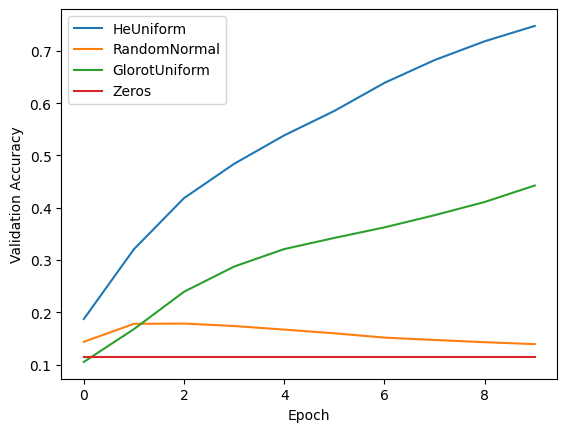

In [31]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [32]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [33]:
simple_model_bn().summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)               

In [34]:
init = tf.keras.initializers.random_normal()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
21/21 [==============================] - 4s 97ms/step - loss: 1.9561 - accuracy: 0.3685 - val_loss: 2.2956 - val_accuracy: 0.2664
Epoch 2/10
21/21 [==============================] - 1s 27ms/step - loss: 1.2396 - accuracy: 0.6330 - val_loss: 2.2845 - val_accuracy: 0.3120
Epoch 3/10
21/21 [==============================] - 0s 20ms/step - loss: 0.9520 - accuracy: 0.7273 - val_loss: 2.2676 - val_accuracy: 0.3249
Epoch 4/10
21/21 [==============================] - 0s 24ms/step - loss: 0.7832 - accuracy: 0.7800 - val_loss: 2.2430 - val_accuracy: 0.3338
Epoch 5/10
21/21 [==============================] - 0s 22ms/step - loss: 0.6757 - accuracy: 0.8106 - val_loss: 2.2089 - val_accuracy: 0.3625
Epoch 6/10
21/21 [==============================] - 0s 20ms/step - loss: 0.6035 - accuracy: 0.8311 - val_loss: 2.1629 - val_accuracy: 0.3916
Epoch 7/10
21/21 [==============================] - 0s 20ms/step - loss: 0.5500 - accuracy: 0.8456 - val_loss: 2.1023 - val_accuracy: 0.4363
Epoch 8/10
21

In [35]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
21/21 [==============================] - 4s 79ms/step - loss: 1.0305 - accuracy: 0.6959 - val_loss: 2.2969 - val_accuracy: 0.1035
Epoch 2/10
21/21 [==============================] - 0s 21ms/step - loss: 0.4615 - accuracy: 0.8729 - val_loss: 2.2901 - val_accuracy: 0.1049
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 0.3487 - accuracy: 0.9047 - val_loss: 2.2808 - val_accuracy: 0.1434
Epoch 4/10
21/21 [==============================] - 0s 20ms/step - loss: 0.2915 - accuracy: 0.9215 - val_loss: 2.2683 - val_accuracy: 0.2215
Epoch 5/10
21/21 [==============================] - 1s 27ms/step - loss: 0.2540 - accuracy: 0.9322 - val_loss: 2.2503 - val_accuracy: 0.3114
Epoch 6/10
21/21 [==============================] - 0s 22ms/step - loss: 0.2274 - accuracy: 0.9396 - val_loss: 2.2276 - val_accuracy: 0.4159
Epoch 7/10
21/21 [==============================] - 0s 23ms/step - loss: 0.2062 - accuracy: 0.9448 - val_loss: 2.1947 - val_accuracy: 0.5576
Epoch 8/10
21

In [36]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
21/21 [==============================] - 5s 92ms/step - loss: 0.8103 - accuracy: 0.7472 - val_loss: 2.0900 - val_accuracy: 0.2618
Epoch 2/10
21/21 [==============================] - 0s 23ms/step - loss: 0.2620 - accuracy: 0.9235 - val_loss: 1.8165 - val_accuracy: 0.5220
Epoch 3/10
21/21 [==============================] - 1s 25ms/step - loss: 0.1797 - accuracy: 0.9465 - val_loss: 1.6353 - val_accuracy: 0.6128
Epoch 4/10
21/21 [==============================] - 1s 25ms/step - loss: 0.1354 - accuracy: 0.9601 - val_loss: 1.4440 - val_accuracy: 0.6879
Epoch 5/10
21/21 [==============================] - 1s 28ms/step - loss: 0.1107 - accuracy: 0.9672 - val_loss: 1.2097 - val_accuracy: 0.8316
Epoch 6/10
21/21 [==============================] - 0s 21ms/step - loss: 0.0906 - accuracy: 0.9734 - val_loss: 0.9935 - val_accuracy: 0.8810
Epoch 7/10
21/21 [==============================] - 0s 19ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.7582 - val_accuracy: 0.9112
Epoch 8/10
21

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/10
21/21 [==============================] - 7s 159ms/step - loss: 0.8012 - accuracy: 0.7527 - val_loss: 1.9912 - val_accuracy: 0.6065
Epoch 2/10
21/21 [==============================] - 1s 27ms/step - loss: 0.2334 - accuracy: 0.9322 - val_loss: 1.6823 - val_accuracy: 0.7566
Epoch 3/10
21/21 [==============================] - 0s 22ms/step - loss: 0.1618 - accuracy: 0.9534 - val_loss: 1.4878 - val_accuracy: 0.8126
Epoch 4/10
21/21 [==============================] - 0s 20ms/step - loss: 0.1255 - accuracy: 0.9634 - val_loss: 1.2958 - val_accuracy: 0.8498
Epoch 5/10
21/21 [==============================] - 0s 20ms/step - loss: 0.1024 - accuracy: 0.9704 - val_loss: 1.0916 - val_accuracy: 0.8886
Epoch 6/10
21/21 [==============================] - 0s 21ms/step - loss: 0.0836 - accuracy: 0.9756 - val_loss: 0.8684 - val_accuracy: 0.9040
Epoch 7/10
21/21 [==============================] - 0s 20ms/step - loss: 0.0685 - accuracy: 0.9800 - val_loss: 0.6656 - val_accuracy: 0.9162
Epoch 8/10
2

In [39]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 16.
Epoch 26: early stopping
Train Acc: 0.9937846064567566 Test Acc: 0.9647230505943298


In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)